# Project Description

The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns

Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
Predict - CGPA of a student based on different grades in four years.

# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn


import warnings                                    
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [3]:
# conversion dict
points = [0.0,1.0,1.3,1.7,2,2.3,2.7,3,3.3,3.7,4.0,4.0]
grades = ['E','D','D+','C-','C','C+','B-','B','B+','A-','A','A+']
conversion = dict(zip(grades, points))

# applying conversion
df= df.replace(conversion)

In [4]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,2.7,1.3,1.7,2,1.7,1.3,1.0,1.7,2.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3,3.7,2.205
1,CS-97002,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,...,1.3,1.0,2.0,1.0,3.7,2.7,2,2,3,2.008
2,CS-97003,4.0,3,4.0,2.7,3.3,4.0,2.7,3.3,3.7,...,3,3,4.0,2,4.0,4.0,4.0,3.7,4.0,3.608
3,CS-97004,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,...,1.3,2,1.3,1.7,2.7,3,2.3,2.3,2.3,1.906
4,CS-97005,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,...,2.7,3.3,3.3,2.7,3.7,4.0,3.7,3.7,4.0,3.448


In [5]:
df.tail()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
566,CS-97567,3,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,...,3.7,3.7,4.0,4.0,4.0,3.3,3.3,3,4.0,3.798
567,CS-97568,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,...,3.3,3.3,4.0,4.0,3.7,3,3.7,2,3.7,3.772
568,CS-97569,3,4.0,3.7,3.3,4.0,4.0,4.0,4.0,4.0,...,3.7,3,4.0,3.3,4.0,2,3.3,3.7,3.7,3.470
569,CS-97570,4.0,3.3,1.0,4.0,1.0,1.3,2.7,1.7,2.7,...,1.0,3,3.0,1.7,1.0,2,3,2.7,2,2.193
570,CS-97571,2,1.0,1.0,2,2,1.3,3,2.3,2,...,2.3,2,2.7,1.0,F,1.7,3.3,1.0,1.7,1.753


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    float64
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

# Data Cleaning

checking for all the null values in columns

In [7]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [8]:
df.isnull().sum().sum()

425

In [9]:
df.describe(include='all')

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571,571.0,571.0,570.0,570.0,569.0,571.000000,569.0,569.0,569.0,...,561.0,559.0,559.000000,559.0,486.0,558.0,558.0,557.0,492.0,571.000000
unique,571,12.0,11.0,12.0,12.0,12.0,NaN,12.0,12.0,11.0,...,13.0,11.0,NaN,12.0,13.0,12.0,11.0,11.0,12.0,NaN
top,CS-97001,4.0,3.7,4.0,4.0,4.0,NaN,3.7,4.0,3.7,...,4.0,2.7,NaN,3.0,3.7,4.0,3.7,3.7,3.7,NaN
freq,1,133.0,82.0,208.0,130.0,123.0,NaN,116.0,121.0,137.0,...,179.0,79.0,NaN,86.0,177.0,197.0,120.0,122.0,157.0,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,3.312084,NaN,NaN,NaN,...,NaN,NaN,3.111628,NaN,NaN,NaN,NaN,NaN,NaN,2.954888
std,NaN,NaN,NaN,NaN,NaN,NaN,0.810746,NaN,NaN,NaN,...,NaN,NaN,0.867612,NaN,NaN,NaN,NaN,NaN,NaN,0.620552
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.800000
25%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,...,NaN,NaN,2.700000,NaN,NaN,NaN,NaN,NaN,NaN,2.538000
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,...,NaN,NaN,3.300000,NaN,NaN,NaN,NaN,NaN,NaN,3.029000
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,...,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.451000


In [10]:
# dropping the column 'Seat No' as it is not relevant to EDA
df=df.drop('Seat No.',axis=1)

In [11]:
#converting all columns data type into float.
df = df.apply(pd.to_numeric, errors='coerce')


In [12]:
df.fillna(df.mean(), inplace=True)

# Expolatory Data Analysis (EDA)

In [13]:
df.describe(include='all')

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.014261,2.608070,3.277208,2.874074,3.004610,3.312084,2.957951,2.978938,3.010211,2.702124,...,2.941472,2.715399,3.111628,2.562593,3.304412,3.468306,3.017626,2.981159,3.280124,2.954888
std,0.953456,0.904688,0.888934,0.997250,0.901352,0.810746,0.830683,0.939279,0.819243,0.994650,...,1.010256,0.822319,0.858430,0.779231,0.650399,0.637633,0.717216,0.835342,0.615970,0.620552
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.800000
25%,2.300000,2.000000,3.000000,2.000000,2.300000,3.000000,2.700000,2.300000,2.300000,2.000000,...,2.000000,2.000000,2.700000,2.000000,3.000000,3.300000,2.700000,2.300000,3.000000,2.538000
50%,3.300000,2.700000,3.700000,3.000000,3.300000,3.700000,3.000000,3.300000,3.300000,2.702124,...,3.000000,2.700000,3.300000,2.700000,3.304412,3.700000,3.000000,3.000000,3.300000,3.029000
75%,3.700000,3.300000,4.000000,3.700000,3.700000,4.000000,3.700000,3.700000,3.700000,3.700000,...,4.000000,3.300000,4.000000,3.000000,3.700000,4.000000,3.700000,3.700000,3.700000,3.451000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.985000


In [14]:
df.shape

(571, 42)

In [15]:
df.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')

In [16]:
df.dtypes

PH-121       float64
HS-101       float64
CY-105       float64
HS-105/12    float64
MT-111       float64
CS-105       float64
CS-106       float64
EL-102       float64
EE-119       float64
ME-107       float64
CS-107       float64
HS-205/20    float64
MT-222       float64
EE-222       float64
MT-224       float64
CS-210       float64
CS-211       float64
CS-203       float64
CS-214       float64
EE-217       float64
CS-212       float64
CS-215       float64
MT-331       float64
EF-303       float64
HS-304       float64
CS-301       float64
CS-302       float64
TC-383       float64
MT-442       float64
EL-332       float64
CS-318       float64
CS-306       float64
CS-312       float64
CS-317       float64
CS-403       float64
CS-421       float64
CS-406       float64
CS-414       float64
CS-419       float64
CS-423       float64
CS-412       float64
CGPA         float64
dtype: object

<Axes: >

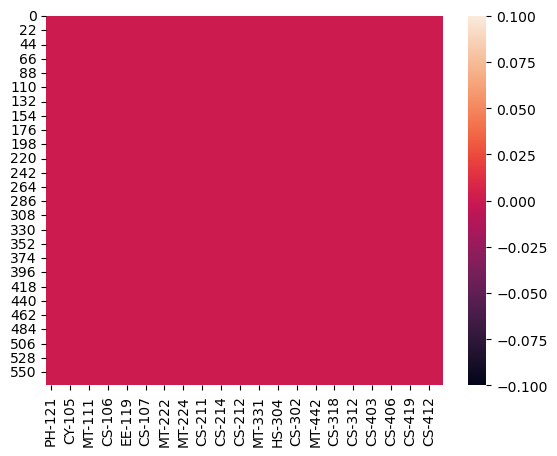

In [17]:
sns.heatmap(df.isnull())

In [18]:
df.nunique()

PH-121        11
HS-101        11
CY-105        11
HS-105/12     11
MT-111        11
CS-105        10
CS-106        11
EL-102        11
EE-119        11
ME-107        11
CS-107        11
HS-205/20     11
MT-222        11
EE-222        11
MT-224        11
CS-210        11
CS-211        11
CS-203        11
CS-214        11
EE-217        11
CS-212        11
CS-215        11
MT-331        11
EF-303        11
HS-304        11
CS-301        11
CS-302        11
TC-383        11
MT-442        11
EL-332        11
CS-318        11
CS-306        11
CS-312        11
CS-317        11
CS-403        11
CS-421        11
CS-406        11
CS-414        11
CS-419        11
CS-423        11
CS-412        11
CGPA         491
dtype: int64

In [19]:
df.shape[0]

571

In [20]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

PH-121
4.000000    133
3.700000    112
3.300000     61
3.000000     57
2.700000     56
1.000000     44
2.000000     33
2.300000     31
1.300000     22
1.700000     19
3.014261      3
Name: count, dtype: int64


HS-101
3.70000    82
2.70000    78
2.00000    68
3.00000    63
3.30000    59
1.70000    50
2.30000    47
1.00000    45
4.00000    42
1.30000    36
2.60807     1
Name: count, dtype: int64


CY-105
4.000000    208
3.700000    120
3.300000     50
3.000000     49
2.700000     42
1.000000     31
2.000000     19
2.300000     17
1.700000     16
1.300000     14
3.277208      5
Name: count, dtype: int64


HS-105/12
4.000000    130
3.700000     75
3.300000     70
3.000000     57
1.000000     45
2.000000     41
2.700000     40
2.300000     39
1.700000     36
1.300000     34
2.874074      4
Name: count, dtype: int64


MT-111
4.00000    123
3.70000    105
2.70000     70
3.30000     62
3.00000     55
1.70000     39
2.30000     33
2.00000     30
1.00000     26
1.30000     21
3.00461      7
Nam

# Checking with the distribution curve

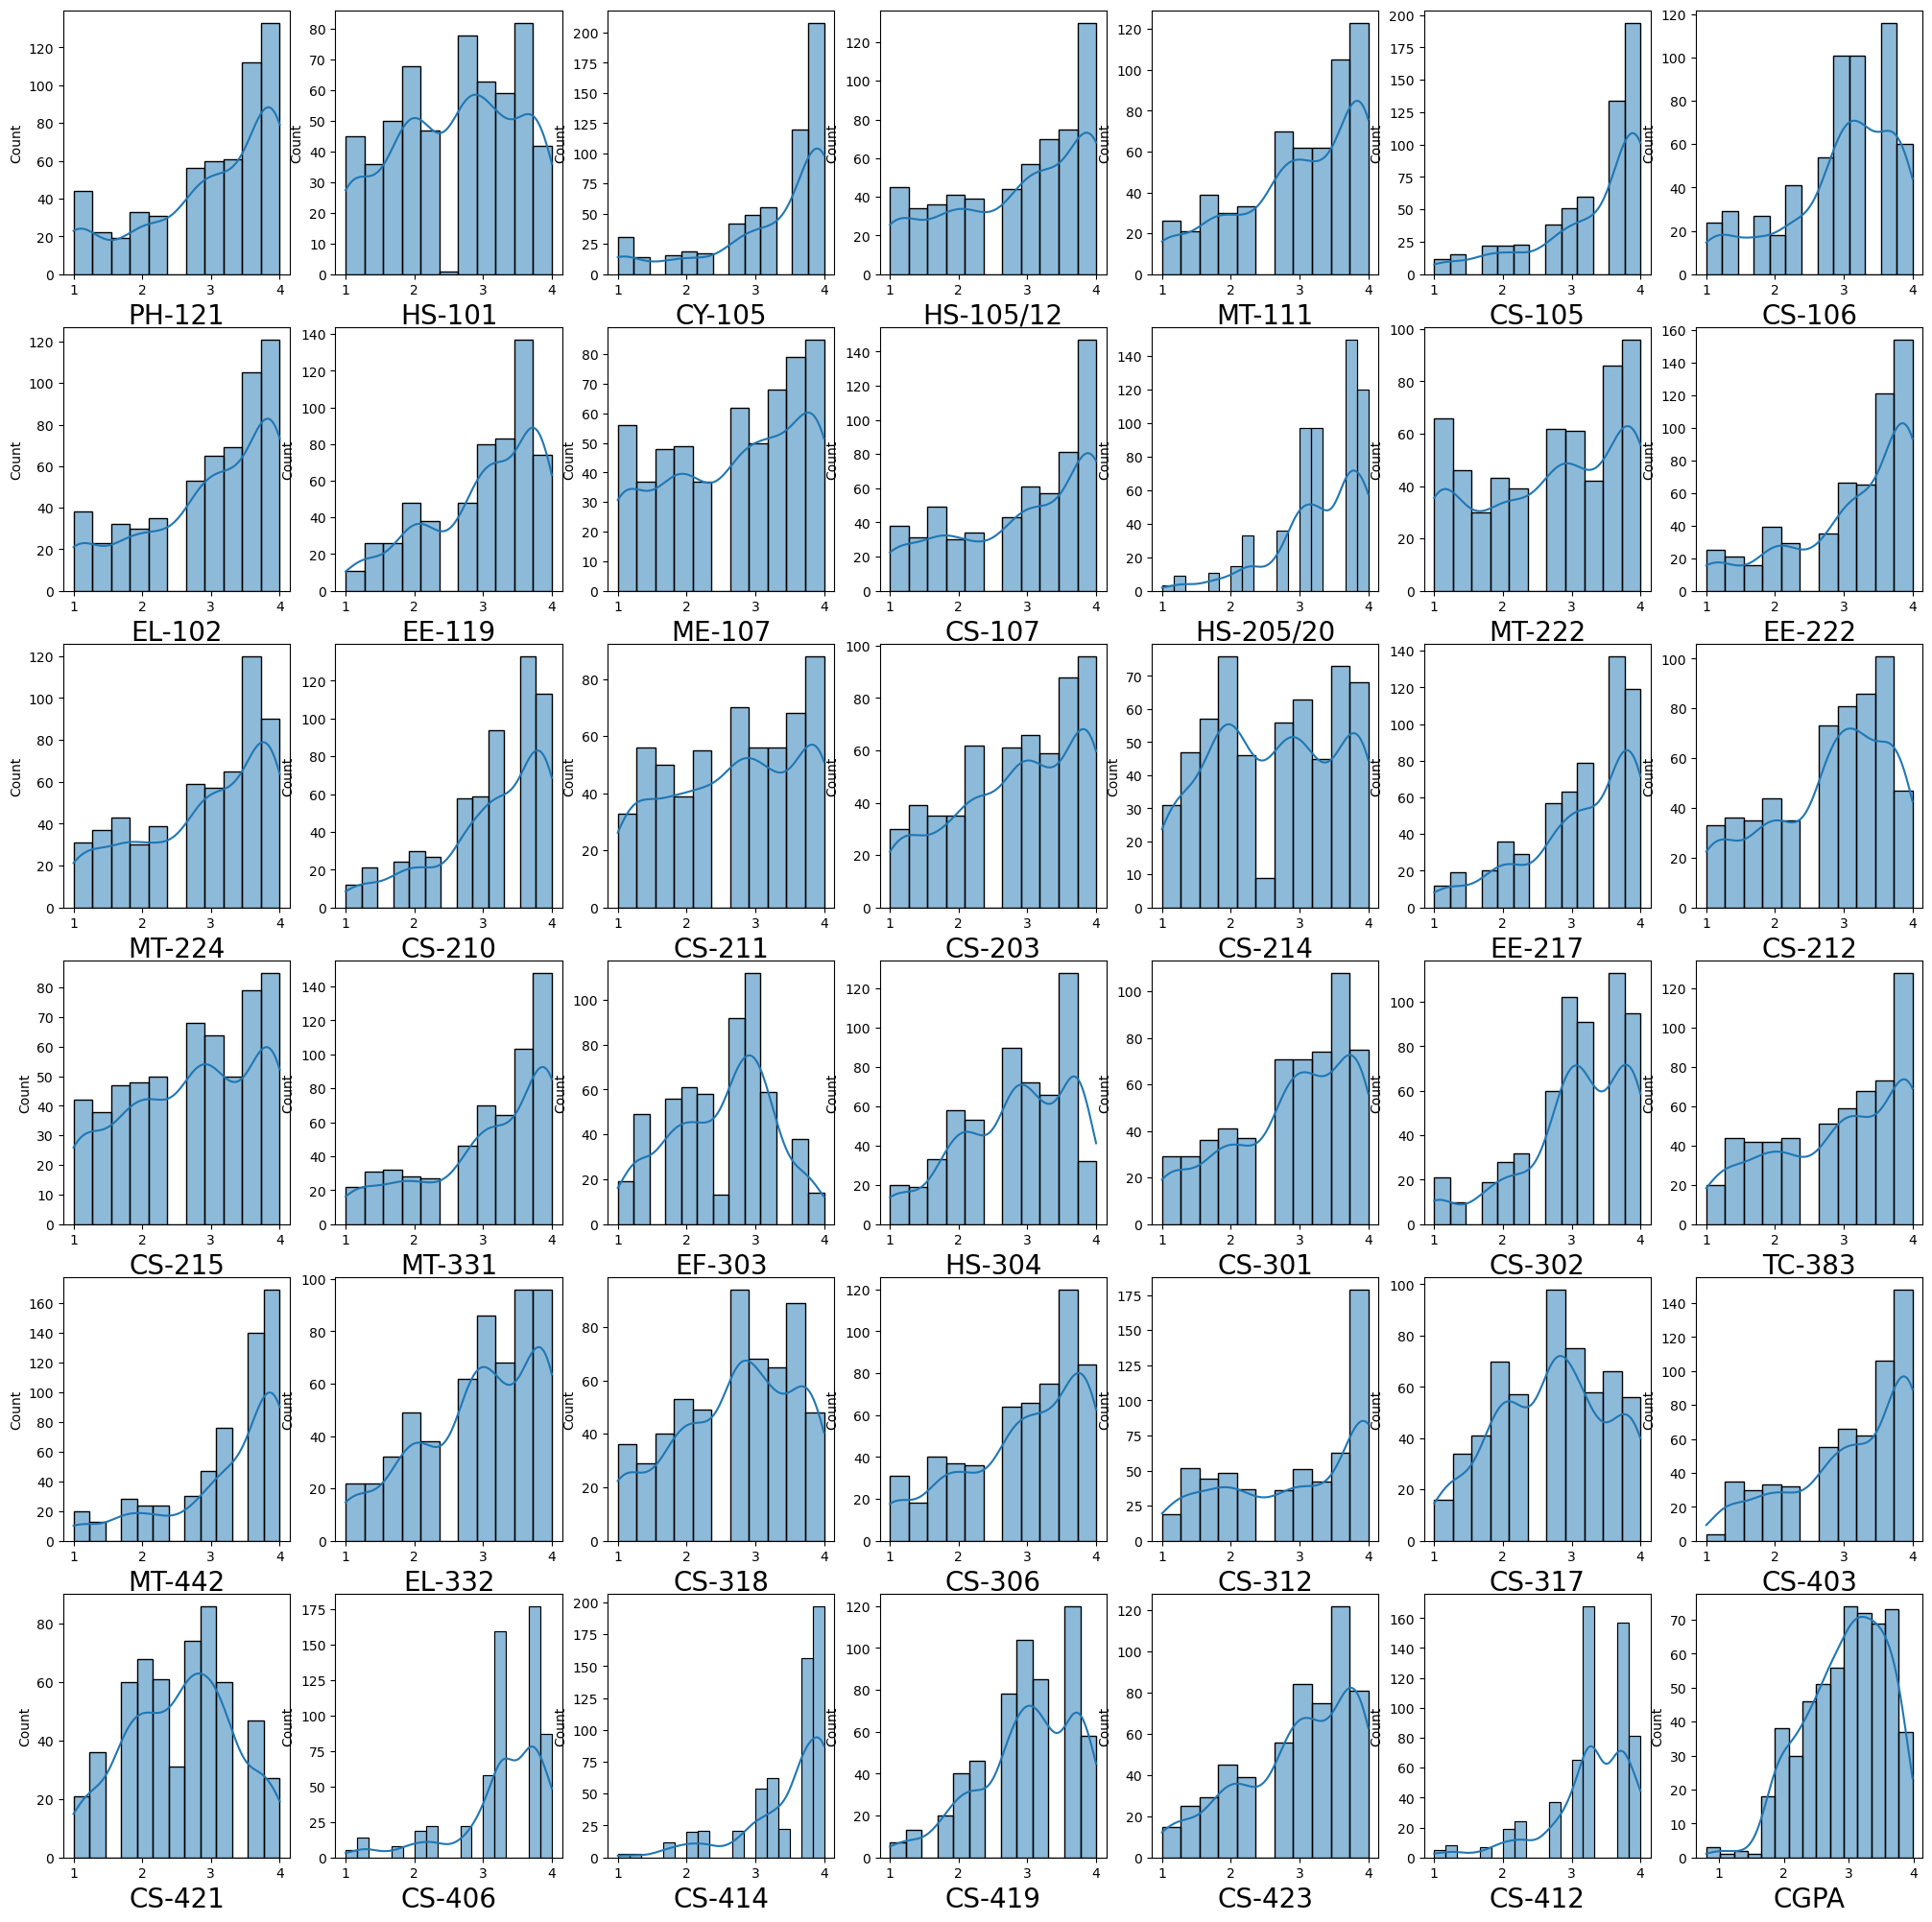

In [21]:
plt.figure(figsize=(25,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=42:
        ax=plt.subplot(6,7,plotnumber)
        sns.histplot(df[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show() 

# Correlation

In [22]:
# Checking the Correlation with respect to target variable-

df.corr()['CGPA'].sort_values()

CS-414       0.356597
HS-205/20    0.464622
CS-406       0.467388
CS-412       0.513078
CS-312       0.518788
MT-331       0.532718
CS-423       0.545852
HS-101       0.548325
EF-303       0.555208
CS-318       0.558662
EE-222       0.562629
CS-106       0.569867
HS-304       0.574554
MT-442       0.602865
CS-403       0.608620
CS-107       0.619338
CS-105       0.629329
EL-102       0.636456
TC-383       0.637838
HS-105/12    0.641309
CS-211       0.641785
PH-121       0.644517
ME-107       0.652023
MT-222       0.652275
CS-203       0.658778
CY-105       0.658918
EE-119       0.661084
CS-421       0.665562
EE-217       0.675526
CS-212       0.686540
CS-419       0.704105
MT-224       0.704803
MT-111       0.718538
CS-301       0.724738
CS-306       0.736257
EL-332       0.736857
CS-302       0.737120
CS-214       0.738913
CS-215       0.746937
CS-317       0.761637
CS-210       0.779624
CGPA         1.000000
Name: CGPA, dtype: float64

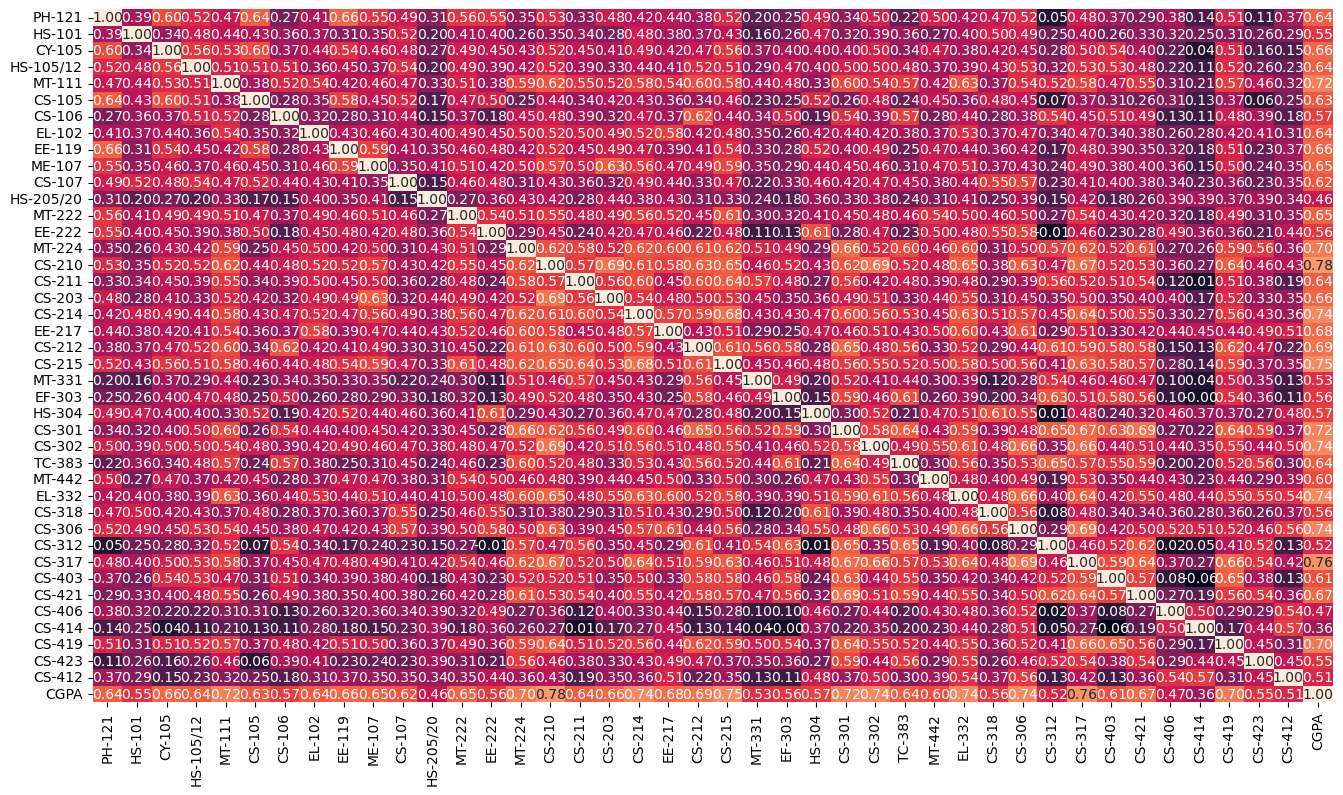

In [23]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',cbar=False)
plt.show()

# Checking for skewness

In [24]:
df.skew()

PH-121      -0.804510
HS-101      -0.186355
CY-105      -1.288319
HS-105/12   -0.512477
MT-111      -0.687066
CS-105      -1.240521
CS-106      -0.845089
EL-102      -0.722516
EE-119      -0.716199
ME-107      -0.296351
CS-107      -0.564206
HS-205/20   -1.120101
MT-222      -0.314905
EE-222      -0.978400
MT-224      -0.579864
CS-210      -0.932782
CS-211      -0.209031
CS-203      -0.435204
CS-214      -0.064230
EE-217      -0.911899
CS-212      -0.542506
CS-215      -0.275474
MT-331      -0.815018
EF-303      -0.215370
HS-304      -0.491607
CS-301      -0.582628
CS-302      -0.922862
TC-383      -0.461634
MT-442      -1.181979
EL-332      -0.570702
CS-318      -0.362352
CS-306      -0.654518
CS-312      -0.447028
CS-317      -0.173455
CS-403      -0.753489
CS-421      -0.087483
CS-406      -1.520946
CS-414      -1.512114
CS-419      -0.647774
CS-423      -0.661669
CS-412      -1.342887
CGPA        -0.497203
dtype: float64

As we can see from above CS-210  and CS-317 have strong correlation between each other.

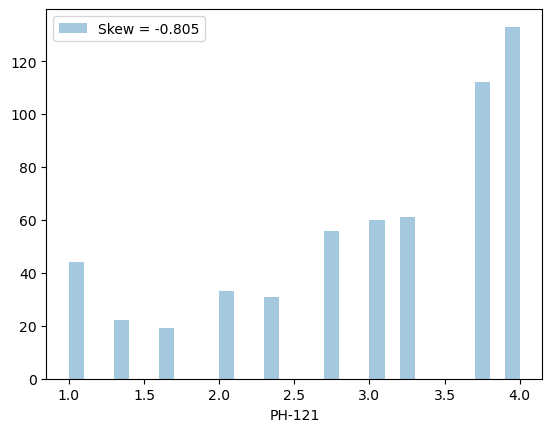

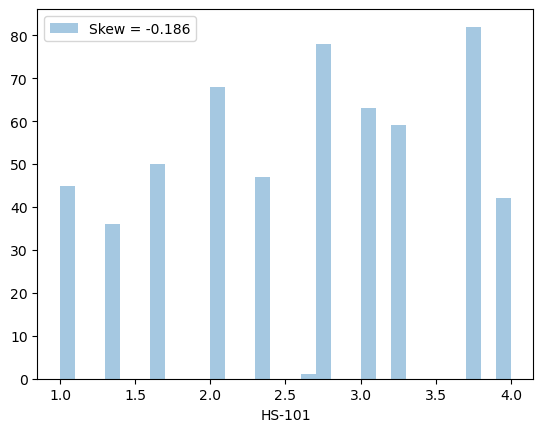

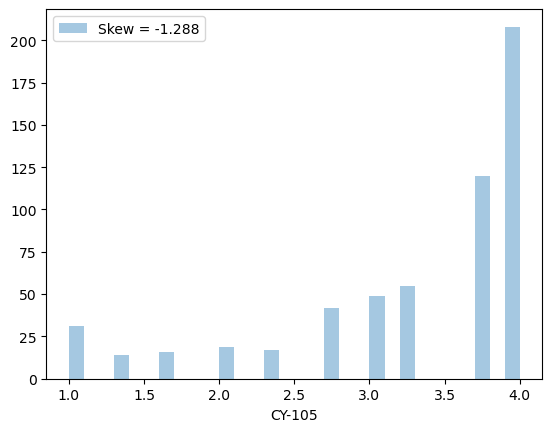

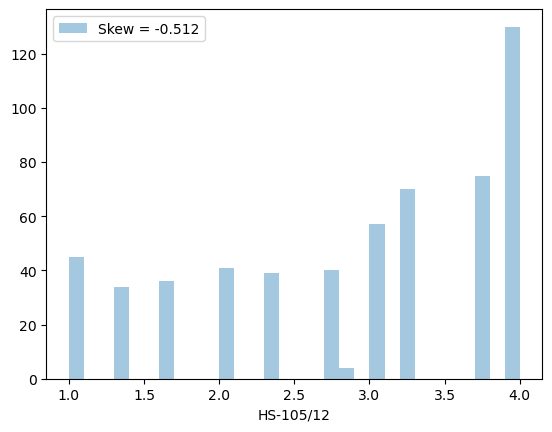

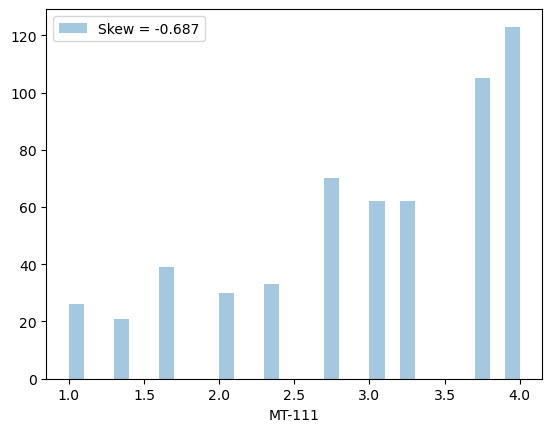

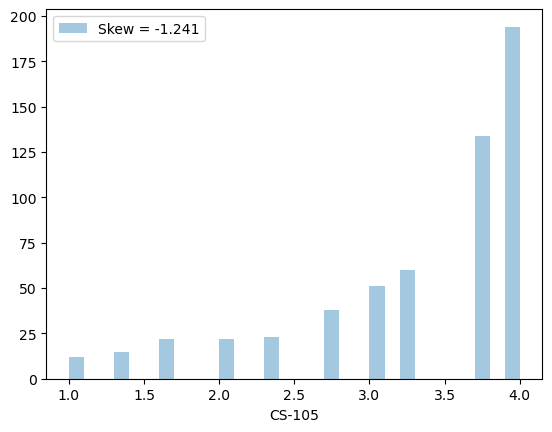

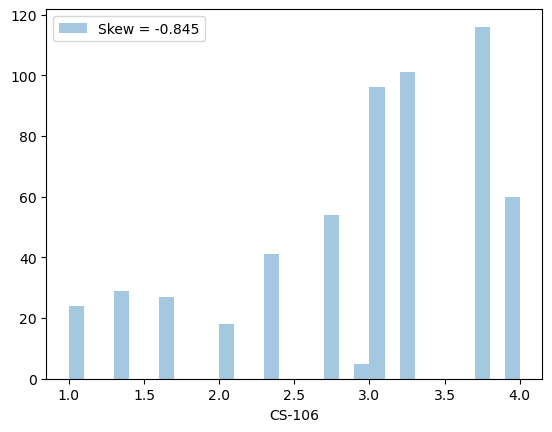

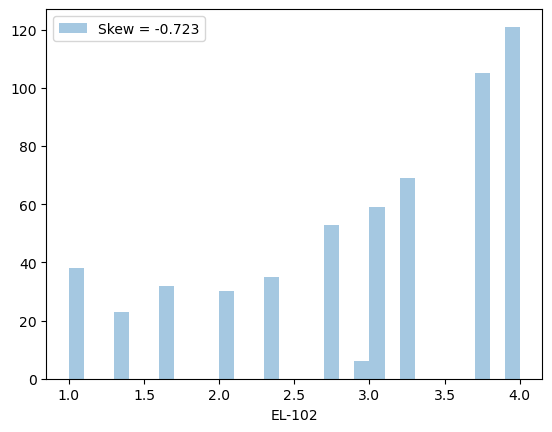

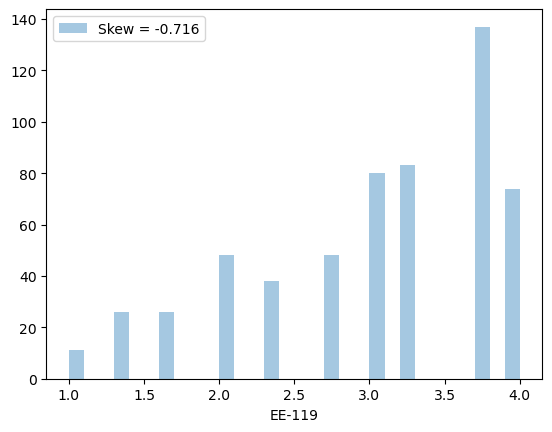

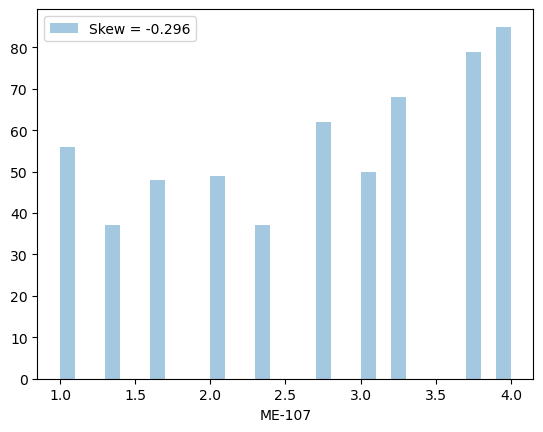

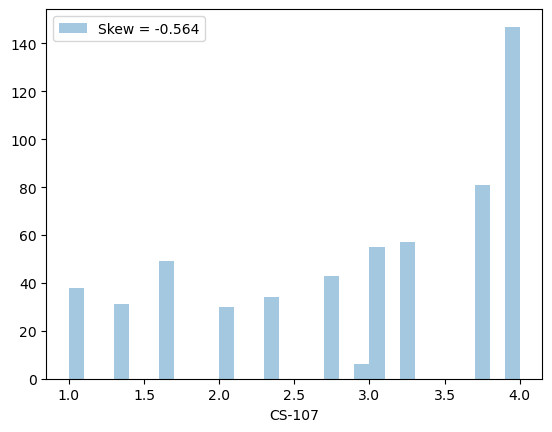

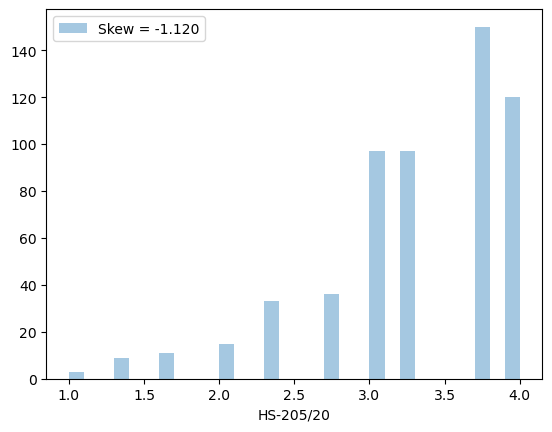

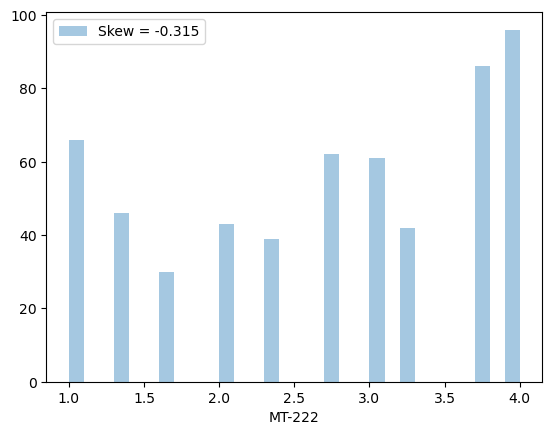

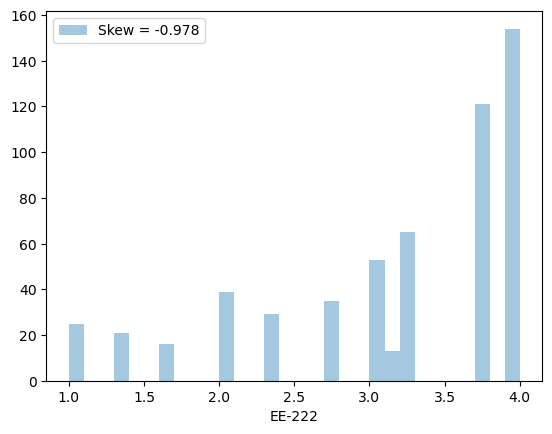

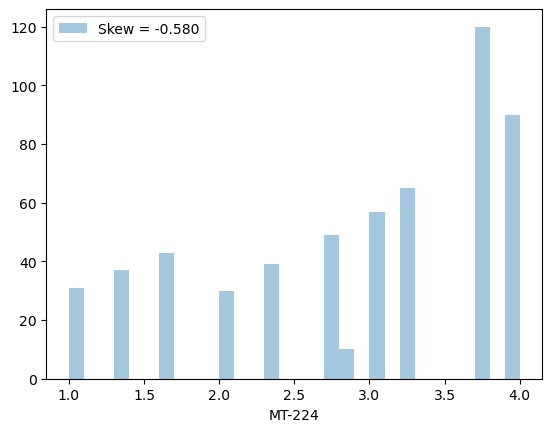

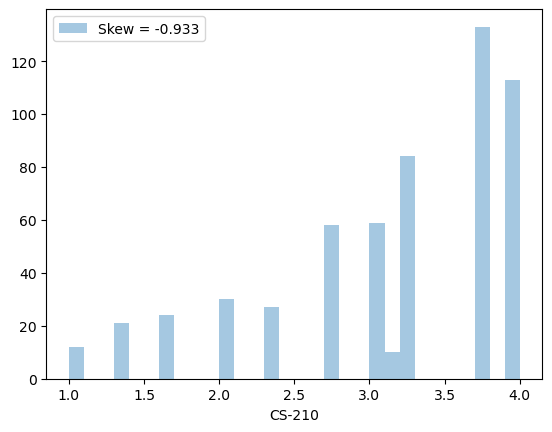

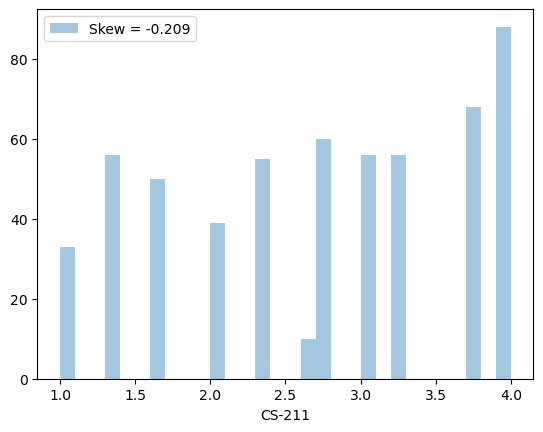

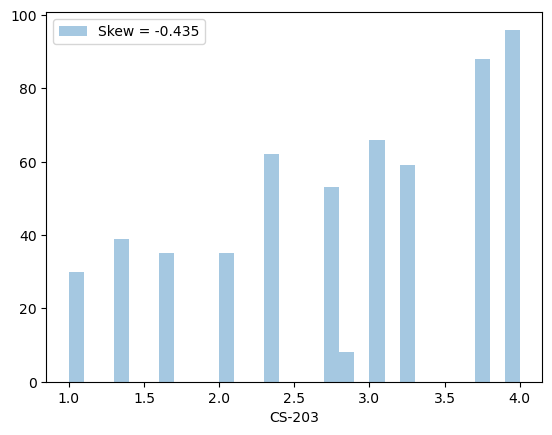

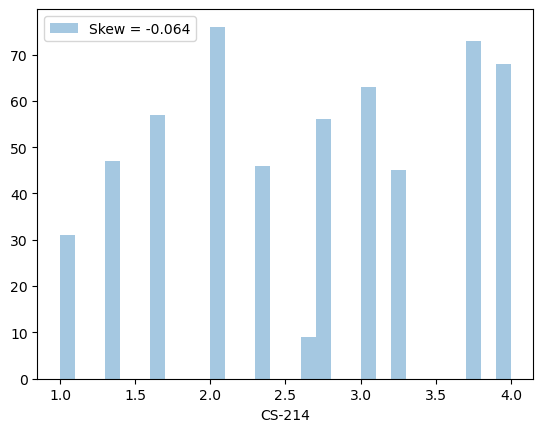

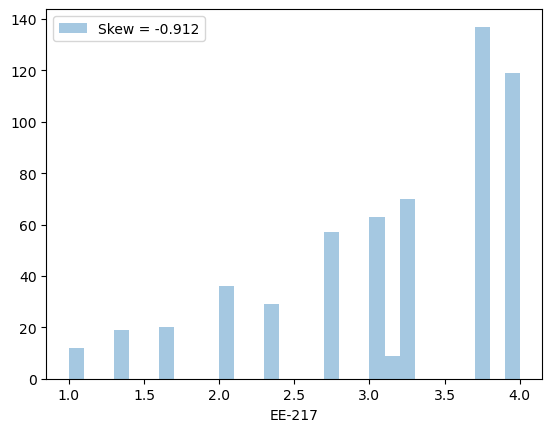

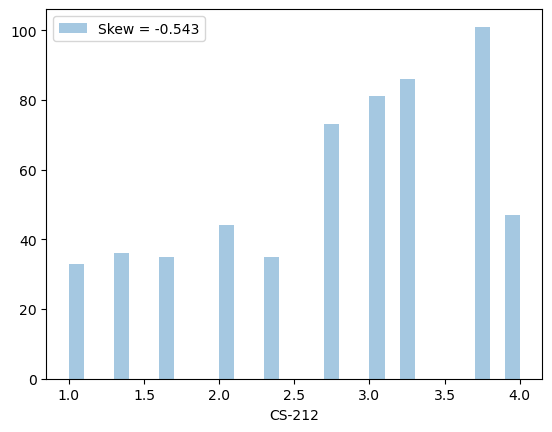

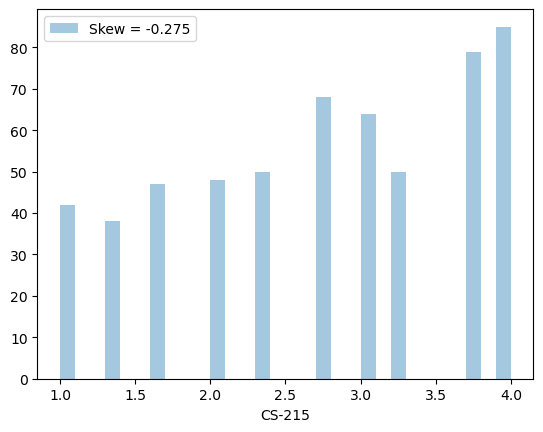

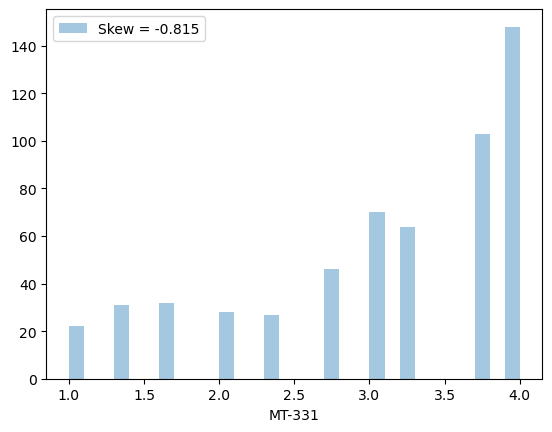

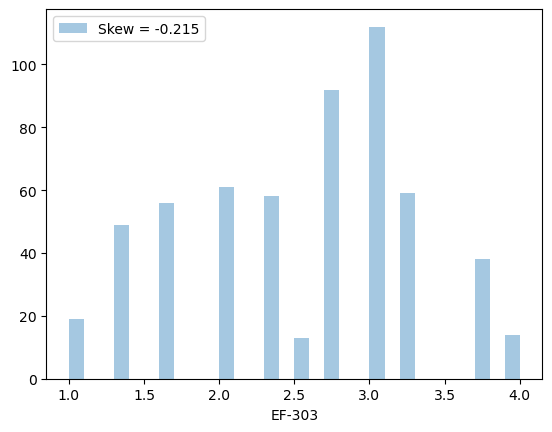

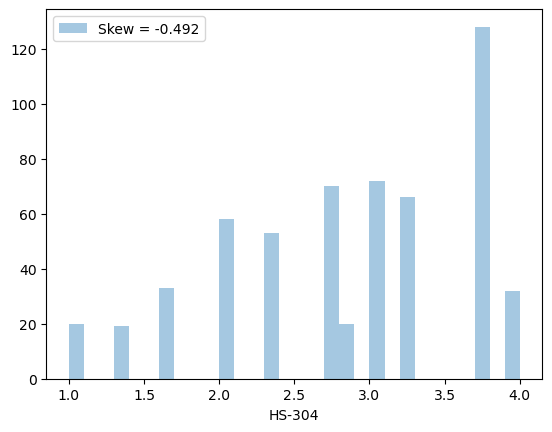

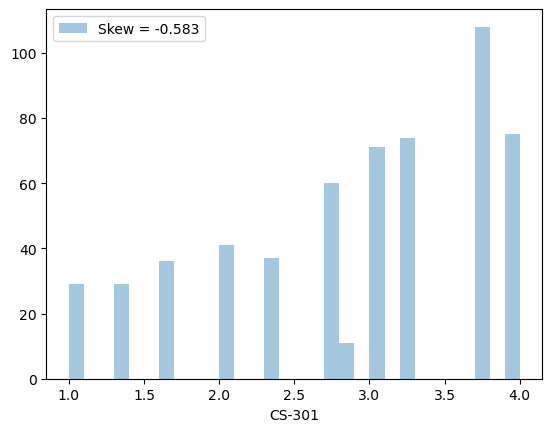

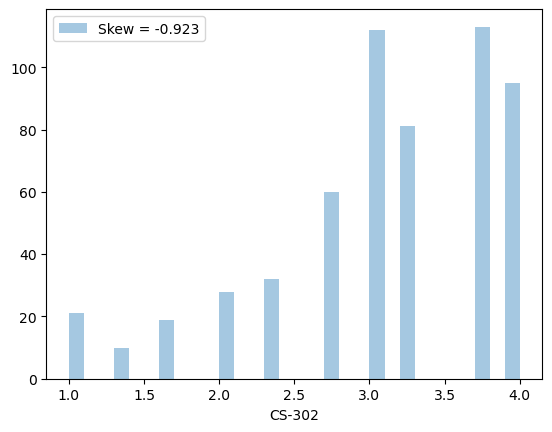

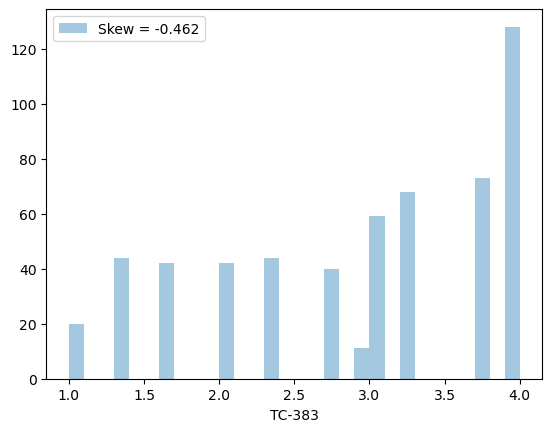

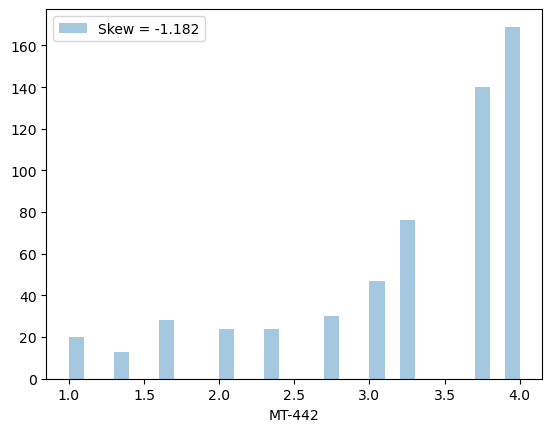

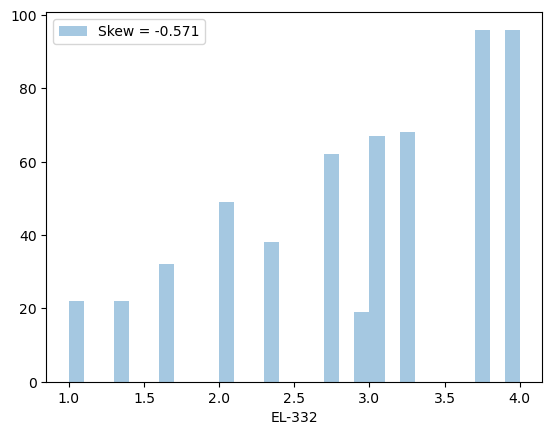

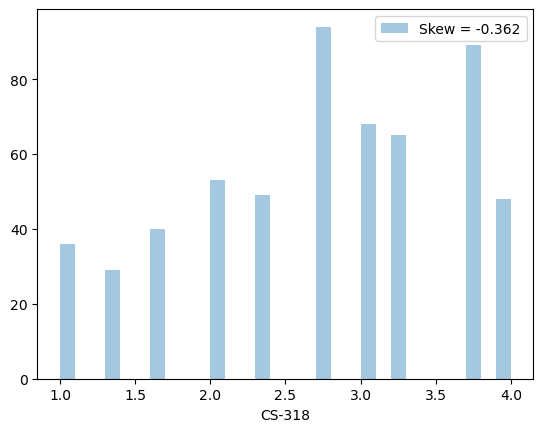

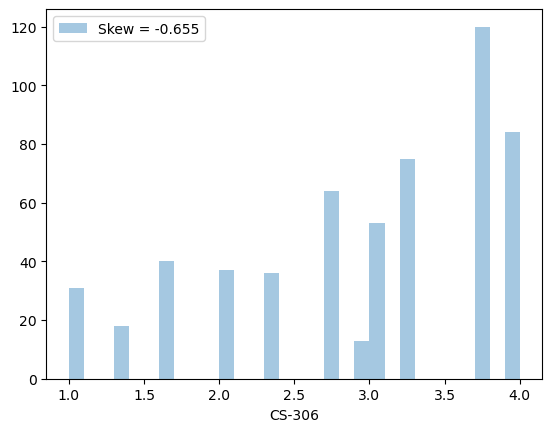

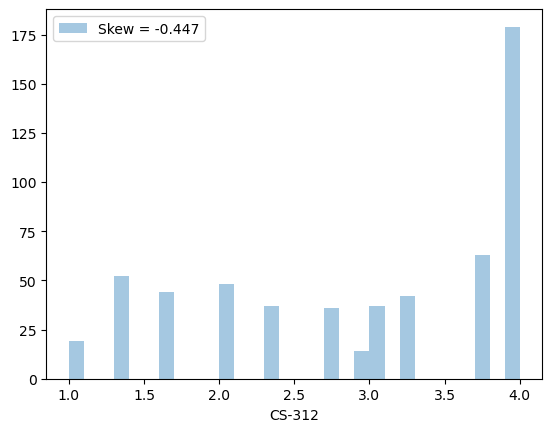

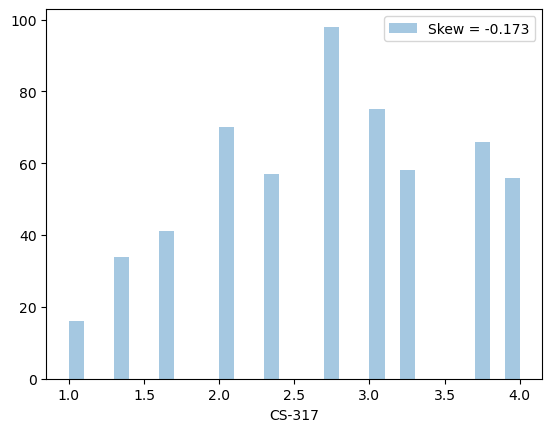

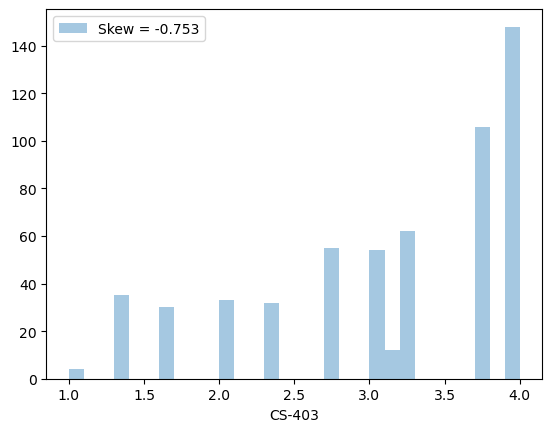

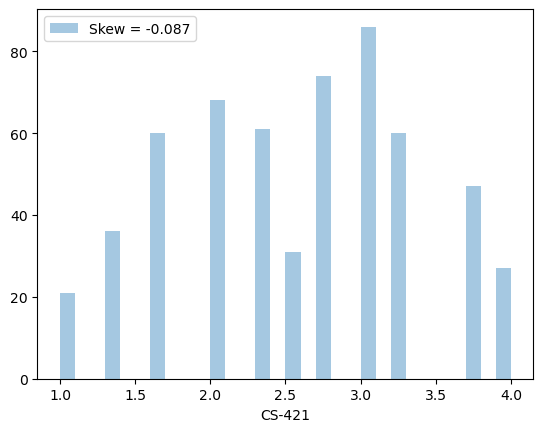

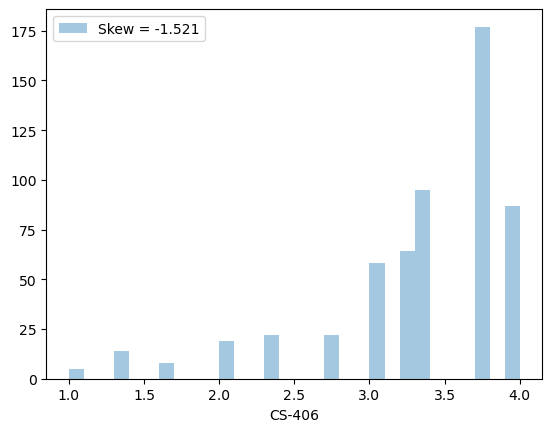

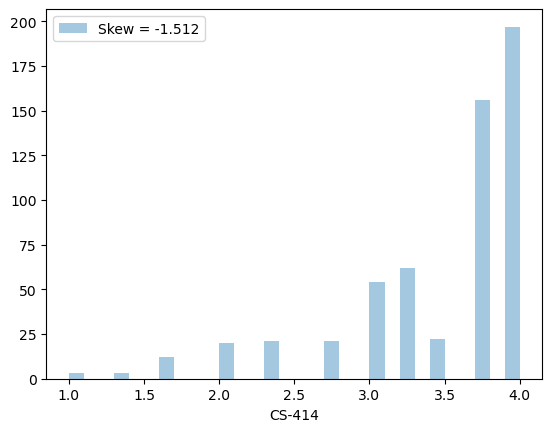

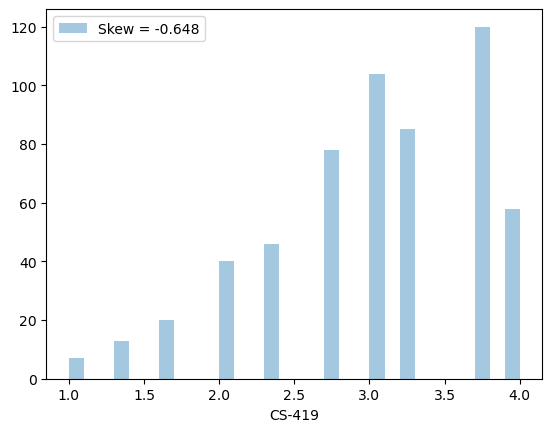

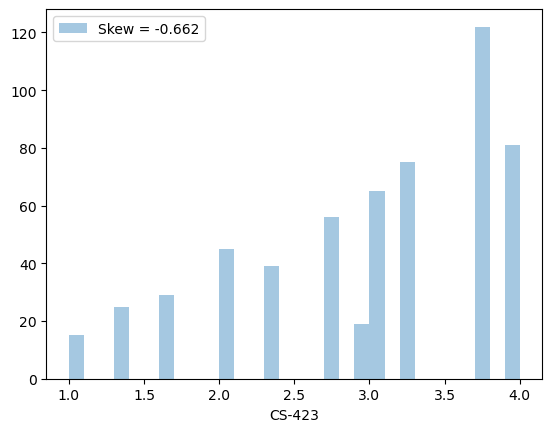

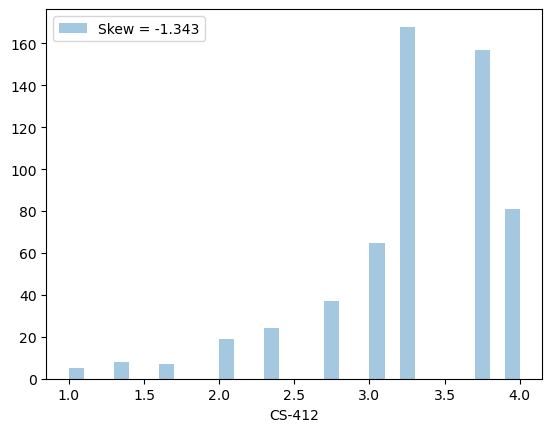

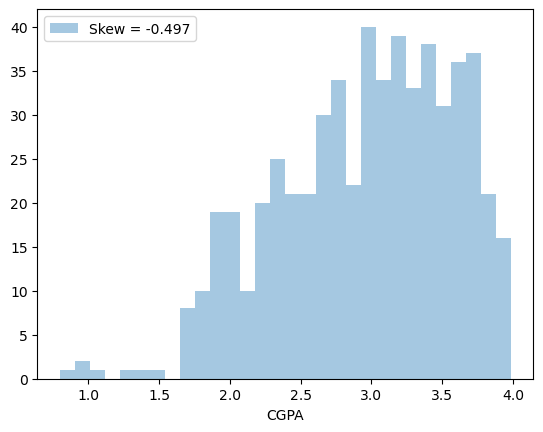

In [25]:
#Trying to gain more Insights about the data

for feat in df:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

# Outliers Removal

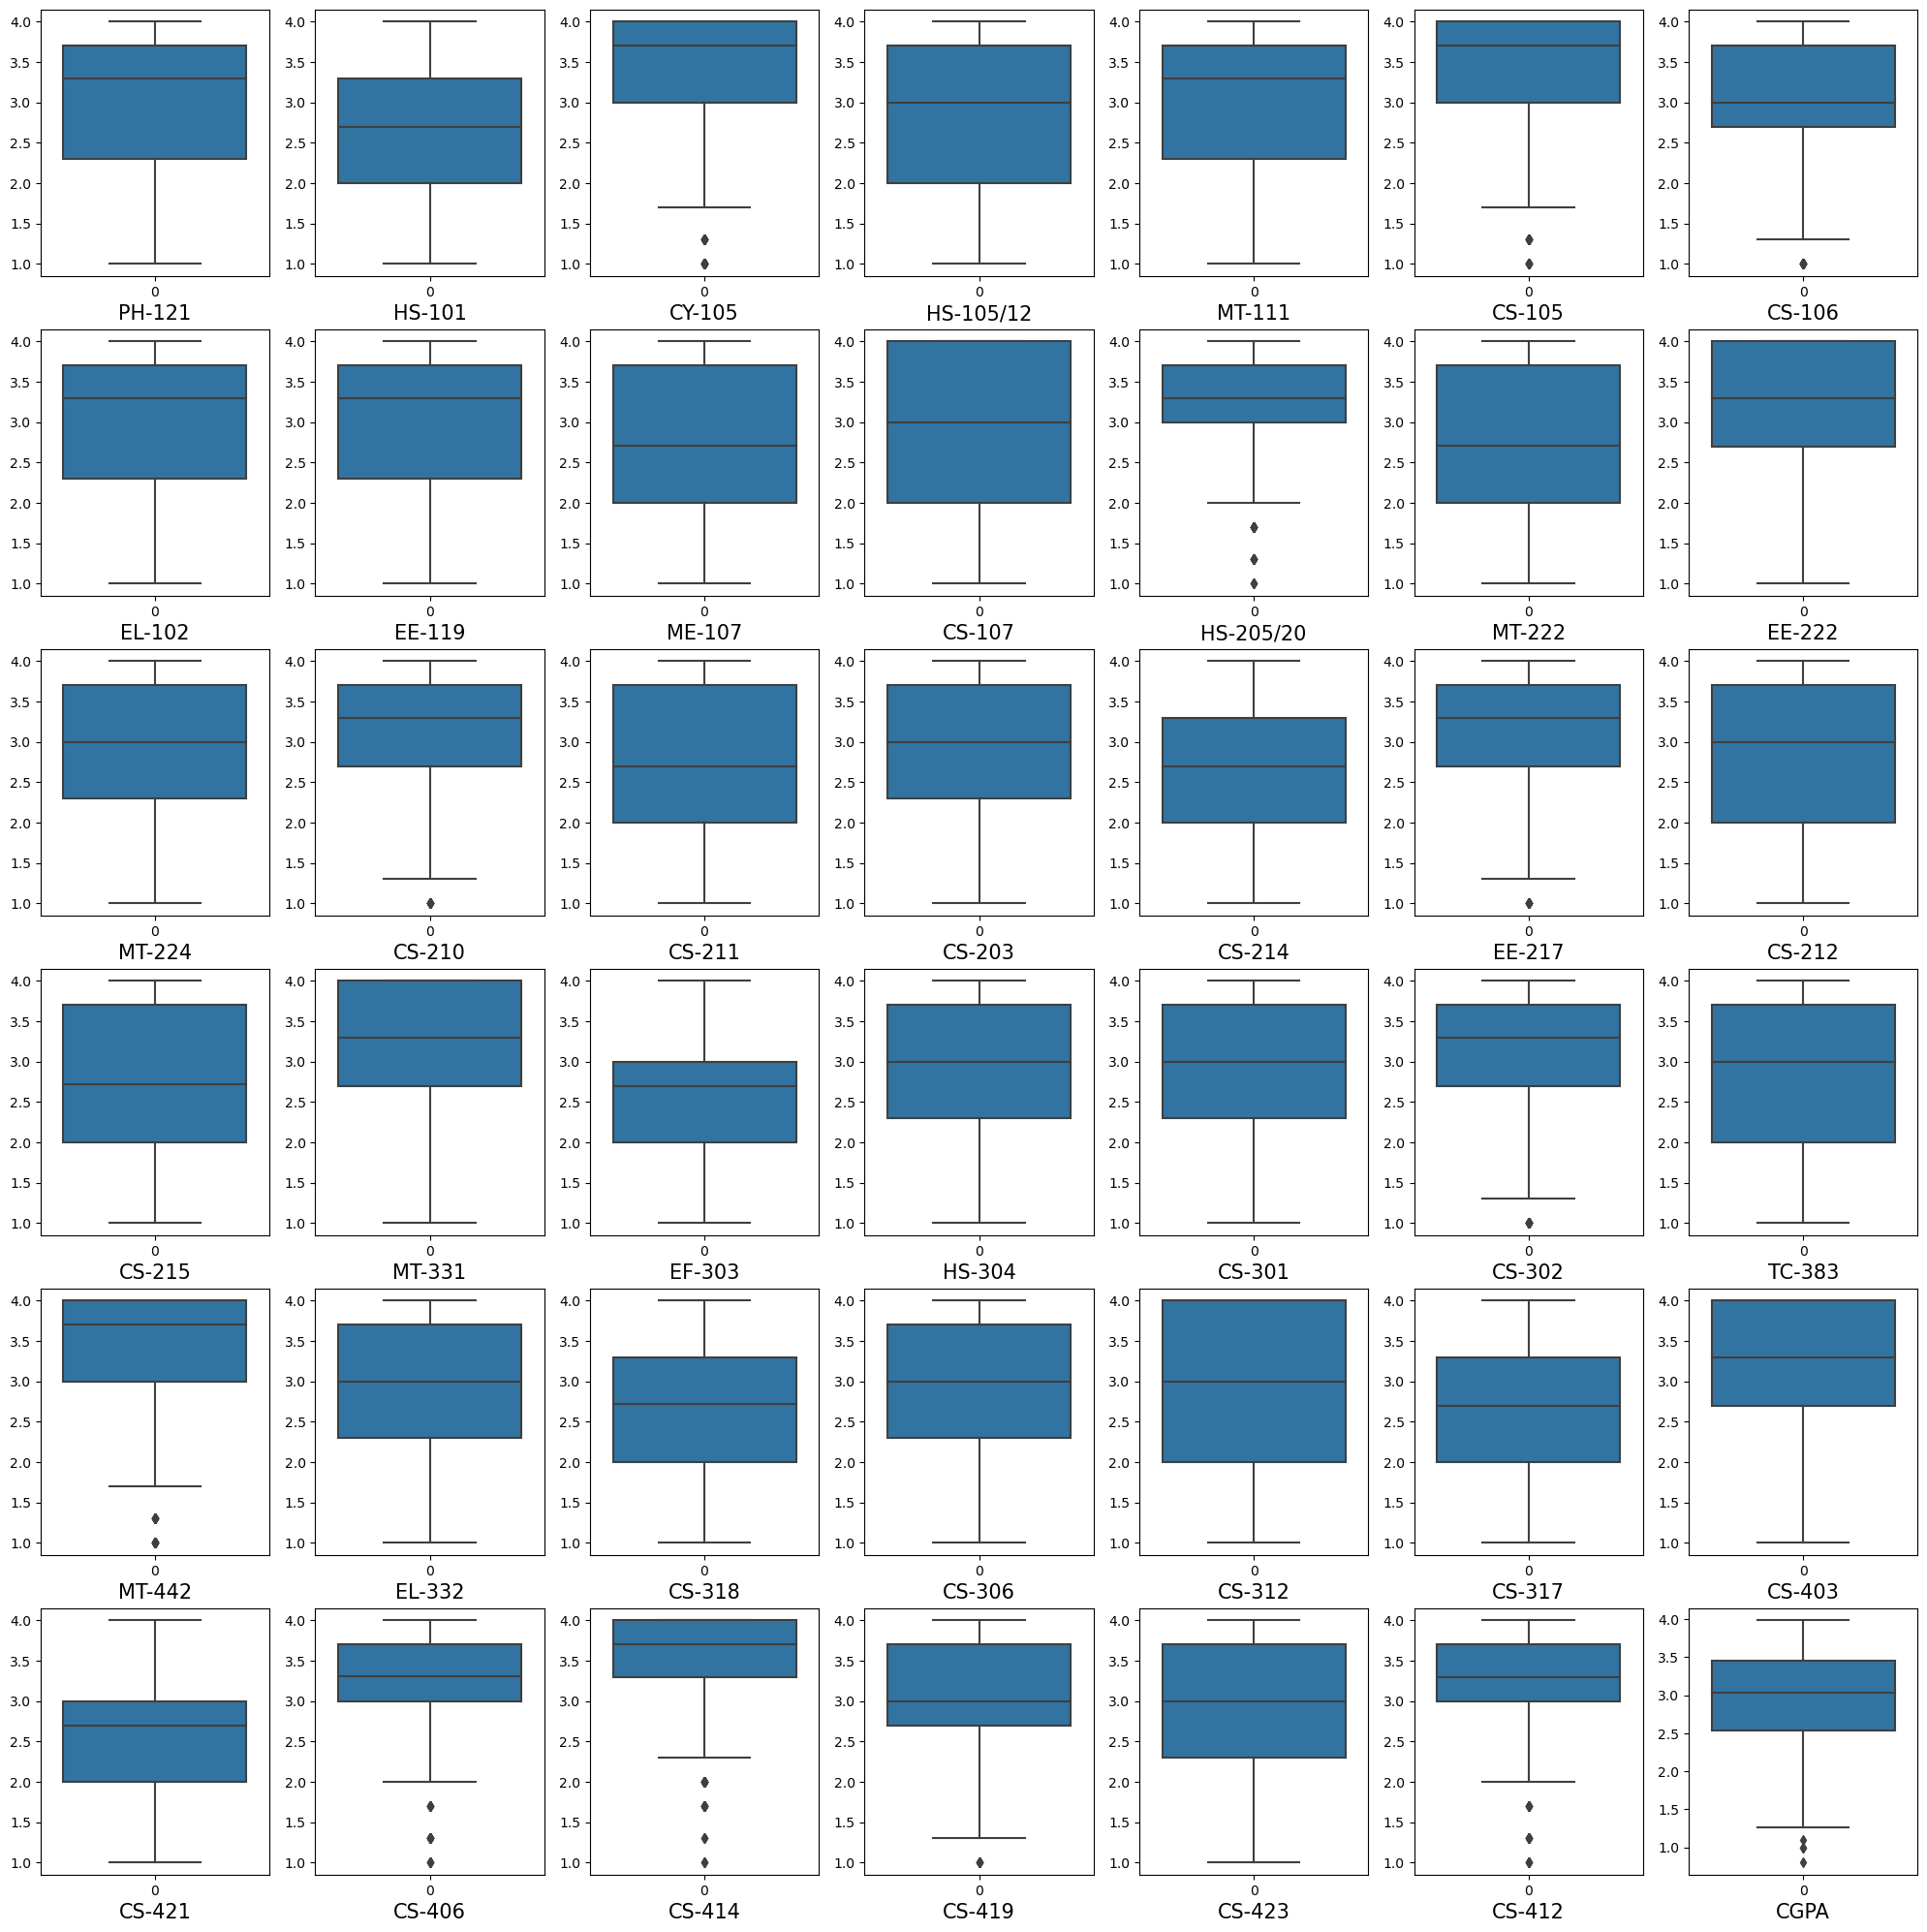

In [26]:
#We are using Boxplot to check outliers.

plt.figure(figsize=(25,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=42:
        ax=plt.subplot(6,7,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()  

In [27]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0.329891,1.447147,1.775825,0.877253,1.448662,2.483943,2.359105,1.362811,0.378988,1.008397,...,1.229946,1.235881,1.645871,1.107950,0.608757,0.834586,1.838751,0.022574,0.682247,1.209480
1,1.034766,1.779044,2.226197,1.880890,0.338244,1.619784,2.359105,1.088023,2.089381,1.712779,...,1.626233,2.087878,1.296090,2.007060,0.608757,1.205990,1.420100,1.175590,0.455168,1.527217
2,1.034766,0.433601,0.813812,0.174707,0.328006,0.849241,0.310801,0.342117,0.842721,1.004123,...,0.057984,0.346400,1.035787,0.722618,1.070417,0.834586,1.370906,0.861289,1.169710,1.053392
3,2.114442,0.340825,2.226197,1.880890,2.225954,0.478887,1.997639,1.362811,2.455894,0.404641,...,1.626233,0.870739,2.112247,1.107950,0.930109,0.735088,1.001449,0.816141,1.592582,1.691731
4,0.719845,1.208026,0.476033,0.427475,1.105299,0.849241,0.894084,0.342117,1.209234,1.004123,...,0.239230,0.711541,0.219630,0.176492,0.608757,0.834586,0.952255,0.861289,1.169710,0.795331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,0.014970,1.539923,0.813812,0.828930,1.105299,0.849241,0.894084,0.768349,1.209234,0.601619,...,0.751486,1.198397,1.035787,1.846267,1.070417,0.264186,0.394054,0.022574,1.169710,1.359839
567,1.034766,1.539923,0.813812,1.130021,1.105299,0.849241,1.255549,0.768349,1.209234,1.306001,...,0.355199,0.711541,1.035787,1.846267,0.608757,0.735088,0.952255,1.175590,0.682247,1.317904
568,0.014970,1.539923,0.476033,0.427475,1.105299,0.849241,1.255549,1.088023,1.209234,0.299741,...,0.751486,0.346400,1.035787,0.947157,1.070417,2.304762,0.394054,0.861289,0.682247,0.830814
569,1.034766,0.765497,2.563976,1.130021,2.225954,2.483943,0.310801,1.362811,0.378988,1.008397,...,1.923447,0.346400,0.130151,1.107950,3.546181,2.304762,0.024597,0.336875,2.080046,1.228834


In [28]:
# index no.

np.where(z>3)

(array([ 57, 101, 101, 141, 143, 186, 198, 210, 210, 217, 255, 263, 275,
        281, 283, 288, 316, 322, 327, 340, 410, 411, 422, 423, 424, 424,
        446, 447, 454, 457, 457, 458, 458, 468, 468, 468, 489, 489, 506,
        509, 513, 521, 523, 526, 527, 527, 547, 550, 552, 552, 557, 558,
        565, 569], dtype=int64),
 array([11, 11, 36, 36, 41, 11, 11, 11, 36, 11, 36, 11, 11, 41, 40, 41, 11,
        11, 36, 40, 37, 36, 40, 36, 11, 36, 40, 40, 40, 36, 40, 36, 40, 36,
        37, 40, 36, 40, 11, 40, 36, 40, 36, 36, 36, 37, 36, 37, 36, 40, 37,
        37, 41, 36], dtype=int64))

In [29]:
df_new=df[(z<3).all(axis=1)]
df_new

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,1.7,...,1.7,1.7,1.7,1.7,3.700000,4.0,1.7,3.0,3.7,2.205
1,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,1.0,...,1.3,1.0,2.0,1.0,3.700000,2.7,2.0,2.0,3.0,2.008
2,4.0,3.0,4.0,2.7,3.3,4.0,2.7,3.3,3.7,3.7,...,3.0,3.0,4.0,2.0,4.000000,4.0,4.0,3.7,4.0,3.608
3,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,2.3,...,1.3,2.0,1.3,1.7,2.700000,3.0,2.3,2.3,2.3,1.906
4,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,3.7,...,2.7,3.3,3.3,2.7,3.700000,4.0,3.7,3.7,4.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,3.7,1.0,4.0,2.0,3.3,3.3,2.0,3.7,2.7,1.0,...,3.0,2.3,3.3,1.3,2.000000,1.7,3.0,2.0,2.7,2.607
566,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,3.3,...,3.7,3.7,4.0,4.0,4.000000,3.3,3.3,3.0,4.0,3.798
567,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,...,3.3,3.3,4.0,4.0,3.700000,3.0,3.7,2.0,3.7,3.772
568,3.0,4.0,3.7,3.3,4.0,4.0,4.0,4.0,4.0,3.0,...,3.7,3.0,4.0,3.3,4.000000,2.0,3.3,3.7,3.7,3.470


In [30]:
df.shape

(571, 42)

In [31]:
df_new.shape

(527, 42)

In [32]:
# percentage data loss:-

loss_percent=(571-527)/(571*100)
print(loss_percent,'%')

0.0007705779334500876 %


In [33]:
 #Transforming the data to remove skewness:-

import sklearn
from sklearn.preprocessing import power_transform
X=power_transform(df,method='yeo-johnson')
X

array([[-0.54829592, -1.42770021, -1.66626046, ..., -0.12604456,
         0.7109932 , -1.2125129 ],
       [ 1.19802549, -1.73209287, -1.79147511, ..., -1.2147575 ,
        -0.71427793, -1.45882766],
       [ 1.19802549,  0.41743111,  1.00551508, ...,  0.89591806,
         1.54750414,  1.10743178],
       ...,
       [-0.21554964,  1.57692261,  0.37862706, ...,  0.89591806,
         0.7109932 ,  0.83402337],
       [ 1.19802549,  0.76031386, -1.85228838, ..., -0.49710992,
        -1.80341349, -1.22806023],
       [-1.17538276, -1.73209287, -1.85228838, ..., -1.90601831,
        -1.97916492, -1.74973906]])

In [34]:
X.ndim


2

In [35]:
X.std()

1.0

In [36]:
x=df_new.drop(['CGPA'],axis=1)
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,1.7,...,2.0,1.7,1.7,1.7,1.7,3.700000,4.0,1.7,3.0,3.7
1,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,1.0,...,1.0,1.3,1.0,2.0,1.0,3.700000,2.7,2.0,2.0,3.0
2,4.0,3.0,4.0,2.7,3.3,4.0,2.7,3.3,3.7,3.7,...,3.7,3.0,3.0,4.0,2.0,4.000000,4.0,4.0,3.7,4.0
3,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,2.3,...,1.7,1.3,2.0,1.3,1.7,2.700000,3.0,2.3,2.3,2.3
4,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,3.7,...,3.7,2.7,3.3,3.3,2.7,3.700000,4.0,3.7,3.7,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,3.7,1.0,4.0,2.0,3.3,3.3,2.0,3.7,2.7,1.0,...,1.7,3.0,2.3,3.3,1.3,2.000000,1.7,3.0,2.0,2.7
566,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,3.3,...,3.3,3.7,3.7,4.0,4.0,4.000000,3.3,3.3,3.0,4.0
567,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,...,3.7,3.3,3.3,4.0,4.0,3.700000,3.0,3.7,2.0,3.7
568,3.0,4.0,3.7,3.3,4.0,4.0,4.0,4.0,4.0,3.0,...,3.3,3.7,3.0,4.0,3.3,4.000000,2.0,3.3,3.7,3.7


In [37]:
y=df_new['CGPA']
y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
564    2.607
566    3.798
567    3.772
568    3.470
570    1.753
Name: CGPA, Length: 527, dtype: float64

# Machine Learning Algorithms and Testing Process

In [38]:
# dividing the dataset in training and testing set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# determining the shapes of training and testing sets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(421, 41)
(421,)
(106, 41)
(106,)


# Linear regression model

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(x_train, y_train)

# Predict the results on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.017013826857111242


# Random Forest Regressor

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create a Random Forest Regressor model
model = RandomForestRegressor()

# Train the model
model.fit(x_train, y_train)

# Predict the results on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.024092316193396173


# Support Vector Regressor

In [41]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Create a Support Vector Regressor model
model = SVR()

# Train the model
model.fit(x_train, y_train)

# Predict the results on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.018216779969307168


# Gradient Boosting Regressor model

In [42]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Create a Gradient Boosting Regressor model
model = GradientBoostingRegressor()

# Train the model
model.fit(x_train, y_train)

# Predict the results on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.015349586328954851


# Conclusion

Out of all models:
SVR: Mean Squared Error = 0.022662960768940067
SVR has the lowest Mean Squared Error thus indicate better model performance.